In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('../data/clustered_data1.csv')
features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'tempo']
stats = df.groupby('cluster')[features].mean()
stats

,danceability,energy,valence,acousticness,instrumentalness,liveness,speechiness,tempo
cluster,,,,,,,,
0,0.574052,0.765070,0.333909,0.067836,0.779369,0.197606,0.076016,0.522899
1,0.514145,0.765378,0.316461,0.081055,0.027854,0.236324,0.087843,0.527905
2,0.644020,0.616799,0.692679,0.598313,0.013610,0.306331,0.138628,0.490341
3,0.404507,0.213056,0.229722,0.870072,0.855947,0.157638,0.055738,0.438415
4,0.682662,0.766170,0.723809,0.110969,0.018033,0.190552,0.092065,0.509921
5,0.505661,0.337070,0.322861,0.747153,0.020132,0.165645,0.055335,0.467599


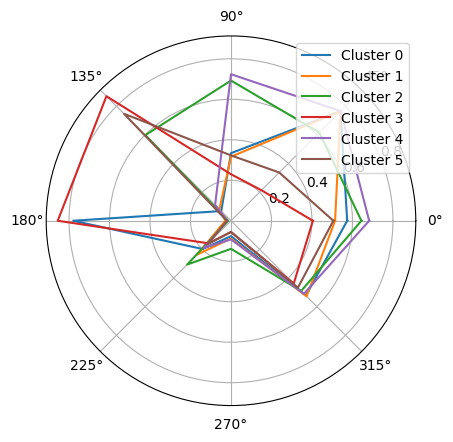

In [10]:
for idx, row in stats.iterrows():
    angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    values = np.concatenate((row.values, [row.values[0]]))
    plt.polar(angles, values, label=f'Cluster {idx}')
plt.legend(loc='upper right')
plt.show()